In [2]:
import torch
import time

def benchmark_throughput(model, input_size, num_iterations=100):
    # Create random input tensor
    input_tensor = torch.randn(*input_size)

    # Move model and input tensor to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    input_tensor = input_tensor.to(device)

    # Warm-up run
    with torch.no_grad():
        model(input_tensor)

    # Start benchmarking
    start_time = time.time()
    for _ in range(num_iterations):
        with torch.no_grad():
            model(input_tensor)
    end_time = time.time()

    # Calculate throughput
    elapsed_time = end_time - start_time
    throughput = num_iterations / elapsed_time

    return throughput

In [3]:
import pandas as pd
from const import (
   ANTIVAX,
   TWITTER16,
   TWITTER15,
   PHEME,
   FIGLANG_TWITTER,
   POLITIFACT,
) 

dataset = TWITTER16 
df = pd.read_csv(f'results/{dataset}.csv')



hs4_df = df.loc[df['model'] == 'hs4']
bert_df = df.loc[df['model'] == 'bert']
bert_df = df.loc[df['model'] == 'han']

In [4]:
hs4_df
for i in range(0, len(hs4_df)):

   model = hs4_df.iloc[i]['model']
   manifold = hs4_df.iloc[i]['manifold']
   fourier = hs4_df.iloc[i]['fourier']
   print(manifold)
   print(fourier)
   f1 = hs4_df.iloc[i]['f1']
   prec = hs4_df.iloc[i]['prec']
   rec = hs4_df.iloc[i]['rec']
   train_time = hs4_df.iloc[i]['train time']
   print(f'{prec:1f} & {rec:1f} & {f1:1f} & {train_time}')
   print('-----------------')

lorentz
True
0.937500 & 0.944853 & 0.937500 & 2.654853582382202
-----------------
poincare
True
0.968750 & 0.970395 & 0.968594 & 2.8624484539031982
-----------------
lorentz
False
0.906250 & 0.907490 & 0.905973 & 2.4380900859832764
-----------------
poincare
False
0.843750 & 0.879261 & 0.838141 & 2.827037811279297
-----------------


In [5]:
import wandb
import matplotlib.pyplot as plt

# Step 1: Initialize wandb and retrieve data
api = wandb.Api()
entity, project = 'eddiechen372', dataset 
runs = api.runs(f"{entity}/{project}")


In [6]:
from tqdm.auto import tqdm
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
for run in tqdm(runs):
   run = api.run(f"{entity}/{project}/{run.id}")
   config = run.config
   history = run.scan_history(keys=['best F1', 'epoch'])
   type = config['type']
   manifold = config['manifold']
   for i,row in enumerate(history):
      row = pd.DataFrame({'type': [type], 'manifold': [manifold], 'epoch': [row['epoch']], 'best F1': [row['best F1']]})
      df = pd.concat([df, row])


/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 13/13 [00:18<00:00,  1.45s/it]


<Axes: xlabel='epoch', ylabel='best F1'>

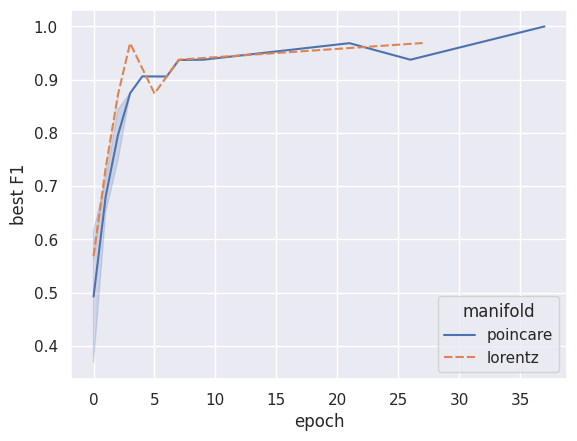

In [7]:
df = df[df['type'] == 'hs4']
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="epoch", y="best F1", hue="manifold", style="manifold")

In [19]:
import torch
from const import (
   LORENTZ, 
   POINCARE, 
   EUCLID, 
   HAN, 
   HYPHEN, 
   HS4, 
   BERT,
   TWITTER16,
   TWITTER15, 
   PHEME,
   POLITIFACT,
   FIGLANG_TWITTER,
   ANTIVAX,
)
from torch.profiler import profile, record_function, ProfilerActivity
from trainer import Trainer 



trainer = Trainer(
    manifold=POINCARE,
    model_type=HYPHEN,
    platform=TWITTER16, 
    max_sen_len=30, 
    max_com_len=30, 
    max_sents=20, 
    max_coms=20, 
    lr = 1e-3, 
    fourier = False,
    curv=1.0,
    enable_log=False,
    embedding_dim=200
)


using manifold  poincare
using fourier False


In [20]:
from const import (DATA_PATH)
import pickle
file = open(f'{DATA_PATH}/data/{dataset}/{dataset}_preprocessed.pkl', 'rb')
df = pd.read_csv(f'data/{dataset}/{dataset}.csv') 
props = pickle.load(file)

id_train, id_test = props['train']['id'], props['val']['id']
raw_c_train, raw_c_val = list(df[df['id'].isin(id_train)]['comments']), list(df[df['id'].isin(id_test)]['comments'])
raw_c_train = [c.split('::') if isinstance(c, str) else '' for c in raw_c_train]
raw_c_val= [c.split('::') if isinstance(c, str) else '' for c in raw_c_val]
x_train, x_val = props['train']['x'], props['val']['x']
y_train, y_val = props['train']['y'], props['val']['y']
c_train, c_val = props['train']['c'], props['val']['c']
sub_train, sub_val = props['train']['subgraphs'], props['val']['subgraphs']

trainer.benchmark( 
   train_x=x_train, 
   train_y=y_train, 
   train_c=c_train, 
   train_raw_c=raw_c_train, 
   val_x=x_val, 
   val_y=y_val, 
   val_c=c_val, 
   val_raw_c=raw_c_val, 
   sub_train=sub_train, 
   sub_val=sub_val, 
)

saved tokenizer
Building model....
building HypPostEnc
building HypComEnc
building CoAttention
hyphen built


/home/jupyter-iec_chau/chau/Hyphen/model/utils/nets.py:139: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.c = torch.tensor(c)


Encoding texts....
preparing dataset....


STAGE:2024-07-10 09:57:17 575209:575209 ActivityProfilerController.cpp:314] Completed Stage: Warm Up
/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/dgl/backend/pytorch/tensor.py:352: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), "Cannot convert view " \


In [ ]:
model = trainer.model
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

Total parameters: 38582528
